# Extracting model information

In the study of ODE systems, there are many calculations which are frequently performed and PyGOM has some functionality to provide assistance.
We will again use the SIR model as our example system, but this time we will make use of the PyGOM `common_models` module, where many predefined models are stored.
This means we avoid having to build the model from scratch again, saving time and lines of code.
Here we initialise a `SIR` model:

In [1]:
from pygom import common_models
model = common_models.SIR()

## Verification

As seen previously, the {func}`.get_ode_eqn` function allows us to verify that our ODE equations are as we'd expect:

In [2]:
model.get_ode_eqn()

Matrix([
[          -I*S*beta/N],
[-I*gamma + I*S*beta/N],
[              I*gamma]])

```{tip}
In addition to showing the Python equation form of the ODEs, we can also display them as either symbols or latex code, which can save some extra typing when porting the equations to another document.
```

In [3]:
model.print_ode()

⎡          -I⋅S⋅β    ⎤
⎢dS/dt=    ───────   ⎥
⎢             N      ⎥
⎢                    ⎥
⎢               I⋅S⋅β⎥
⎢dI/dt=  -I⋅γ + ─────⎥
⎢                 N  ⎥
⎢                    ⎥
⎣dR/dt=      I⋅γ     ⎦


In [4]:
model.print_ode(True)

\begin{array}{cc}dS/dt= & - \frac{I S \beta}{N}\\dI/dt= & - I \gamma + \frac{I S \beta}{N}\\dR/dt= & I \gamma\end{array}


Also as seen before, we can check how each state changes due to each event occurring

In [5]:
model.get_StateChangeMatrix()

Matrix([
[-1,  0],
[ 1, -1],
[ 0,  1]])

and the rate at which events occur:

In [6]:
model.get_EventRateVector()

Matrix([
[I*S*beta/N],
[   I*gamma]])

Again, graphical representation can help with verification:

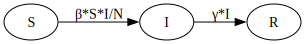

In [7]:
graph=model.get_transition_graph(show=False)
graph

## Algebraic insights

We briefly outline some of the algebraic results which can be quickly accessed by PyGOM. Firstly, we can check if our system is linear:

In [8]:
model.linear_ode()

False

For stability analysis and speeding up numerical integrators, it may be useful to know the Jacobian, Hessian (where three 2D arrays are returned, rather than one 3D array) or gradient which PyGOM has functions for respectively:

```{warning}
In different contexts it can be useful to know the derivatives with respect to the state variables or the parameters. Make sure you know which one you require and check that the PyGOM function you are using provides it.
```

In [9]:
model.get_jacobian_eqn()

Matrix([
[-I*beta/N,         -S*beta/N, 0],
[ I*beta/N, -gamma + S*beta/N, 0],
[        0,             gamma, 0]])

In [10]:
model.get_hessian_eqn()

[Matrix([
 [       0, 0,         I*S/N**2],
 [       0, 0,                0],
 [I*S/N**2, 0, -2*I*S*beta/N**3]]),
 Matrix([
 [        0, 0,       -I*S/N**2],
 [        0, 0,               0],
 [-I*S/N**2, 0, 2*I*S*beta/N**3]]),
 Matrix([
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]])]

In [11]:
model.get_grad_eqn()

Matrix([
[-I*S/N,  0,  I*S*beta/N**2],
[ I*S/N, -I, -I*S*beta/N**2],
[     0,  I,              0]])

## Epidemiology specific insights

Under development are functions to obtain numeric and algebraic expressions for the basic reproduction number, $R_0$.
Currently, these can be obtained in two steps, first by finding the next generation matrix and then calculating $R_0$ from this, assuming in the initial conditions that $S(0)=N$.
We must specify which state represents the *infectious state*, which in this case is the state **I**.

In [12]:
from pygom.model.epi_analysis import *

F, V = disease_progression_matrices(model, 'I')
e = R0_from_matrix(F, V)
print(e)

Update: In the latest version, between state transitions should be passed to SimulateODE via the Event objects.
[S*beta/(N*gamma)]
